## Movie Recommender Project Based off Spacy Word Embeddings

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# !spacy download en_core_web_lg

In [17]:
# !pip install tweet-preprocessor

In [2]:
df=pd.read_csv('~/Downloads/archive (3)/links.csv')

In [3]:
df1=pd.read_csv('~/Downloads/archive (3)/movies.csv')

In [4]:
df2=pd.read_csv('~/Downloads/archive (3)/ratings.csv')

In [5]:
df3=pd.read_csv('~/Downloads/archive (3)/tags.csv')

### EDA

In [6]:
df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Adventure|Animation|Children|Comedy|Fantasy'),
  Text(1, 0, 'Adventure|Children|Fantasy'),
  Text(2, 0, 'Comedy|Romance'),
  Text(3, 0, 'Comedy|Drama|Romance'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Action|Crime|Thriller'),
  Text(6, 0, 'Adventure|Children'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Action|Adventure|Thriller')])

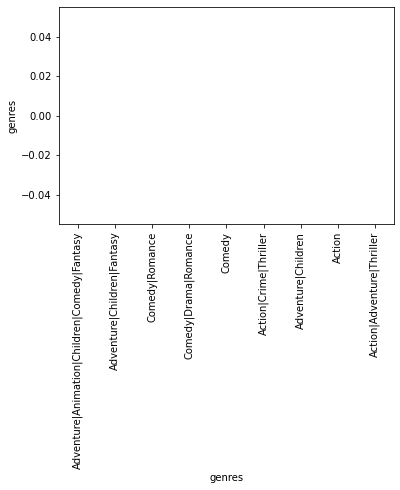

In [9]:
sns.barplot(x=df1.genres[0:10], y=df1.genres[0:10].value_counts()[0:])
plt.xticks(rotation=90)

In [8]:
df2.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [59]:
eda_df= pd.merge(df1, df2, on='movieId', how='inner')

In [81]:
eda_df.rating= str(eda_df.rating)

In [ ]:
eda_df.groupby('title').apply(eda_df['rating'].mean(), ascending=True)

### Building the Rec System

In [49]:
#groupby and drop column to organize df into movieId
df4 = df3.groupby(['movieId']).apply(lambda x : x.sort_values(by=['movieId'], ascending=True))

In [50]:
df4.drop(['movieId'], axis=1, inplace=True)

In [51]:
#merged df with tags to df with titles
test_df= pd.merge(df4, df1, on='movieId', how='inner')

In [156]:
#putting all the tags into one movie entry
from tqdm import tqdm
tqdm.pandas() 
results=[]
for ele in tqdm(test_df.title[:]):
    results.append(test_df[test_df.title==str(ele)].tag)

100%|█████████████████████████████████| 586994/586994 [2:57:04<00:00, 55.25it/s]


In [ ]:
#saving pickle file of results list
# import pickle
# with open ('results.pickle', 'wb') as f:
#     pickle.dump(results, f, 5)

In [53]:
import pickle
with open('results.pickle', 'rb') as file:
      
    # Call load method to deserialze
    results = pickle.load(file)
  

In [54]:
#turning list into pd.Series
df7=pd.Series(results)
df7[0:5]

0    0         animation
1      imdb top 250
2     ...
1    0         animation
1      imdb top 250
2     ...
2    0         animation
1      imdb top 250
2     ...
3    0         animation
1      imdb top 250
2     ...
4    0         animation
1      imdb top 250
2     ...
dtype: object

In [55]:
#concatenating with main df
frames=[test_df.loc[:],df7]
work=pd.concat(frames, axis=1)
work

,movieId,userId,tag,timestamp,title,genres,0
0,1,261,animation,1313154708,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0 animation 1 imdb top 250 2 ...
1,1,155512,imdb top 250,1264024095,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0 animation 1 imdb top 250 2 ...
2,1,155512,humorous,1264024094,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0 animation 1 imdb top 250 2 ...
3,1,155512,funny,1264024092,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0 animation 1 imdb top 250 2 ...
4,1,155512,family,1264024089,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0 animation 1 imdb top 250 2 ...
...,...,...,...,...,...,...,...
586989,151677,132513,nudity,1453951859,Last Hippie Standing (2002),(no genres listed),586985 dance 586986 drugs ...
586990,151677,132513,spirituality,1453951836,Last Hippie Standing (2002),(no genres listed),586985 dance 586986 drugs ...
586991,151677,132513,trippy,1453951839,Last Hippie Standing (2002),(no genres listed),586985 dance 586986 drugs ...
586992,151677,132513,Yogi,1453951834,Last Hippie Standing (2002),(no genres listed),586985 dance 586986 drugs ...


In [56]:
#cleaning up df
work.drop_duplicates(subset='movieId', inplace=True)

In [57]:
#renaming column to tags
work.rename(columns={0:'tags'}, inplace=True)

In [58]:
import re
import string

In [59]:
work.genres=[str(x).translate(str.maketrans('', '', string.punctuation)) for x in work.tags[:]]

In [60]:
work

,movieId,userId,tag,timestamp,title,genres,tags
0,1,261,animation,1313154708,Toy Story (1995),0 animation\n1 imdb top 250\n2 ...,0 animation 1 imdb top 250 2 ...
548,2,1040,itaege,1438050732,Jumanji (1995),548 itaege\n549 scary...,548 itaege 549 scary ...
687,3,32298,sequel,1385355832,Grumpier Old Men (1995),687 sequel\n68...,687 sequel 688...
705,4,43484,chick flick,1308558977,Waiting to Exhale (1995),705 chick flick\n706 revenge\n707 ...,705 chick flick 706 revenge 707 ...
712,5,41136,humorous,1438507539,Father of the Bride Part II (1995),712 humorous\n...,712 humorous 7...
...,...,...,...,...,...,...,...
586971,151567,206004,aliens,1453647533,The War in Space (1977),586971 aliens\n586972 hostile al...,586971 aliens 586972 hostile ali...
586976,151599,73352,crowd funding,1453694405,Capital C (2015),586976 crowd funding\n586977 Documenta...,586976 crowd funding 586977 Documentar...
586979,151621,119408,Australia,1453758146,Looking for Grace (2015),586979 Australia\n586980 Couple...,586979 Australia 586980 Couple ...
586985,151677,132513,dance,1453951844,Last Hippie Standing (2002),586985 dance\n586986 drugs...,586985 dance 586986 drugs ...


In [61]:
#using regex to clean the data
work.genres=[re.sub(r"\d+", ' ', x) for x in work.genres[:]]

In [62]:
work.genres=[re.sub(r"\n", '', x) for x in work.genres[:]]

In [63]:
work.genres=[re.sub(r"\s+", ',', x) for x in work.genres[:]]

In [64]:
#cleaned tags
work.genres=[x.split(',') for x in work.genres[:]]

In [65]:
work.genres[0]

['',
 'animation',
 'imdb',
 'top',
 'humorous',
 'funny',
 'family',
 'children',
 'comedy',
 'fantasy',
 'Pixar',
 'pixarName',
 'tag',
 'Length',
 'dtype',
 'object']

In [801]:
# work.genres=[set(x) for x in work.genres]

In [66]:
work[['title','genres']]

,title,genres
0,Toy Story (1995),"[, animation, imdb, top, humorous, funny, fami..."
548,Jumanji (1995),"[, itaege, scary, Robin, Williams, fantasy, an..."
687,Grumpier Old Men (1995),"[, sequel, old, people, that, is, actually, fu..."
705,Waiting to Exhale (1995),"[, chick, flick, revenge, CLV, characters, gir..."
712,Father of the Bride Part II (1995),"[, humorous, Fantasy, Touching, Comedy, sequel..."
...,...,...
586971,The War in Space (1977),"[, aliens, hostile, aliens, space, travel, Ven..."
586976,Capital C (2015),"[, crowd, funding, Documentary, inspirationalN..."
586979,Looking for Grace (2015),"[, Australia, Couple, relations, Family, relat..."
586985,Last Hippie Standing (2002),"[, dance, drugs, India, music, nudity, spiritu..."


In [67]:
#importing spacy 
import spacy
nlp = spacy.load("en_core_web_lg")

In [68]:
#tokenizer
spacy_tokenizer = nlp.tokenizer

In [69]:
#function to take tag column an return word embedding
def prep(x):
    z=spacy_tokenizer(x) 
    z=nlp(z).vector.reshape(300,)
    return z


In [70]:
#function to tae tag column and return word embedding
def prepare(x):
    z=spacy_tokenizer(x)
    z=nlp(z).vector.reshape(300,)
    return z

In [71]:
work.shape

(21654, 7)

In [74]:
#function that preps word embedding and computes cosine similarity
q= work[work['title']=='Shawshank Redemption, The (1994)'].genres

def rec_movie():
    z=prep(str(q))
    listA=[]
    t=[prepare(str(x)) for x in  work['genres'].loc[:]]
    for i in range(len(t)):
        listA.append(np.dot(t[i], z)/(np.linalg.norm(t[i])*np.linalg.norm(z)))
    ser= listA
    work.timestamp=ser

In [73]:
t=[prepare(str(x)) for x in  work['genres'].loc[0:10]]
t

[array([-1.44678488e-01,  4.29015547e-01, -1.43510615e-02, -1.11023940e-01,
         4.23742682e-01,  1.17198013e-01,  2.80555308e-01, -1.51963875e-01,
        -2.16219172e-01,  1.41499221e+00, -2.75438756e-01, -3.91202345e-02,
         3.89809728e-01,  2.78492160e-02, -1.33310229e-01,  9.40453261e-02,
        -6.70464262e-02,  8.22468936e-01, -9.71699730e-02, -1.09475791e-01,
        -2.27631718e-01,  2.75789648e-01, -5.22272810e-02,  4.36466895e-02,
         3.12624127e-01, -2.24539161e-01,  8.33919123e-02,  8.55472609e-02,
         3.94886792e-01, -1.44156381e-01, -2.23791316e-01, -3.27202566e-02,
        -1.03606455e-01,  1.82441354e-01,  2.15724885e-01, -1.17689192e-01,
         2.65506450e-02,  7.54922479e-02, -1.95294365e-01,  1.91454925e-02,
        -6.60726652e-02, -2.58178025e-01, -7.68186375e-02, -5.93055449e-02,
         1.58691984e-02, -2.22002998e-01,  1.00060165e-01,  9.08483341e-02,
         9.98283774e-02,  1.53040335e-01,  9.79757458e-02, -1.11412618e-03,
        -8.7

In [ ]:
#running function
rec_movie()

In [ ]:
#sorting the cosine similarities
work.timestamp.sort_values(ascending=False)[0:5]

In [810]:
#finding out what movies are returned
work.loc[424669]

movieId                                                  62847
userId                                                  108788
tag                                                 alcoholism
timestamp                                             0.691043
title                Love of Siam, The (Rak haeng Siam) (2007)
genres       [, alcoholism, coming, of, age, family, bonds,...
tags         424669             alcoholism
424670          ...
Name: 424669, dtype: object

In [417]:
TOY STORY::::About Adam, Happy Weekend, In the Mix, StreeDance 3D, The Maze
THE SHAWSHANK REDEMPTION::::: Dog Pound, Prison, In Hell, Women in Cellblock 9, Convict (#w/o cleaned tags)
THE SHAWSHANK REDEMPTION::::: Annie Get Your Gun, Kill Me Again, Don Quixote, Snow White, The Best Little Whorehouse in Texas #with set(x) and cleaned tags
THE SHAWSHANK REDEMPTION::::: The Church, The Hunger Games: Mockingjay - Part2, Beyond All Boundaries, The Flamingo Kid, Shag #with set(x)
THE SHAWSHANK REDEMPTION::::: 'The Hunger Games: Mockingjay - Part2', 'Buster and Billie', 'Wild Tales', 'Human Traffic', 'The Love of Siam'#w/o set(x) and cleaned tags

In [197]:
work[work.title=='Shawshank Redemption, The (1994)']

,movieId,userId,tag,timestamp,title,genres,tags
29752,318,400,drama,0.624667,"Shawshank Redemption, The (1994)",Crime|Drama,29752 drama 29753 prison escape ...


In [196]:
work

,movieId,userId,tag,timestamp,title,genres,tags
0,1,261,animation,0.861402,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0 animation 1 imdb top 250 2 ...
548,2,1040,itaege,0.719058,Jumanji (1995),Adventure|Children|Fantasy,548 itaege 549 scary ...
687,3,32298,sequel,0.517957,Grumpier Old Men (1995),Comedy|Romance,687 sequel 688...
705,4,43484,chick flick,0.616212,Waiting to Exhale (1995),Comedy|Drama|Romance,705 chick flick 706 revenge 707 ...
712,5,41136,humorous,0.521521,Father of the Bride Part II (1995),Comedy,712 humorous 7...
...,...,...,...,...,...,...,...
586971,151567,206004,aliens,0.649898,The War in Space (1977),Action|Adventure|Sci-Fi,586971 aliens 586972 hostile ali...
586976,151599,73352,crowd funding,0.718220,Capital C (2015),Documentary,586976 crowd funding 586977 Documentar...
586979,151621,119408,Australia,0.644885,Looking for Grace (2015),Drama,586979 Australia 586980 Couple ...
586985,151677,132513,dance,0.628245,Last Hippie Standing (2002),(no genres listed),586985 dance 586986 drugs ...
